In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [2]:
#Load th dataset
df = pd.read_csv('sales_data_with_discounts.csv')

In [3]:
#display the basic information about the dataset
print(df.info())
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 450 entries, 0 to 449
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Date               450 non-null    object 
 1   Day                450 non-null    object 
 2   SKU                450 non-null    object 
 3   City               450 non-null    object 
 4   Volume             450 non-null    int64  
 5   BU                 450 non-null    object 
 6   Brand              450 non-null    object 
 7   Model              450 non-null    object 
 8   Avg Price          450 non-null    int64  
 9   Total Sales Value  450 non-null    int64  
 10  Discount Rate (%)  450 non-null    float64
 11  Discount Amount    450 non-null    float64
 12  Net Sales Value    450 non-null    float64
dtypes: float64(3), int64(3), object(7)
memory usage: 45.8+ KB
None
           Volume     Avg Price  Total Sales Value  Discount Rate (%)  \
count  450.000000    450.000000   

In [4]:
#indentify the numerical and categorical columns
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns
categorical_cols = df.select_dtypes(include=['object', 'category']).columns

In [5]:
# Descriptive Analytics for Numerical Columns
for col in numerical_cols:
    mean = df[col].mean()
    median = df[col].median()
    mode = df[col].mode().values[0]
    std_dev = df[col].std()

    print(f"\nStatistics for {col}:")
    print(f"Mean: {mean}")
    print(f"Median: {median}")
    print(f"Mode: {mode}")
    print(f"Standard Deviation: {std_dev}")


Statistics for Volume:
Mean: 5.066666666666666
Median: 4.0
Mode: 3
Standard Deviation: 4.231602391213926

Statistics for Avg Price:
Mean: 10453.433333333332
Median: 1450.0
Mode: 400
Standard Deviation: 18079.90483993645

Statistics for Total Sales Value:
Mean: 33812.83555555555
Median: 5700.0
Mode: 24300
Standard Deviation: 50535.07417255328

Statistics for Discount Rate (%):
Mean: 15.155241895330914
Median: 16.57776564929597
Mode: 5.007822189204133
Standard Deviation: 4.220602153325511

Statistics for Discount Amount:
Mean: 3346.499424342415
Median: 988.9337332382784
Mode: 69.17794228822787
Standard Deviation: 4509.9029633539985

Statistics for Net Sales Value:
Mean: 30466.336131270138
Median: 4677.788059301853
Mode: 326.97480055470817
Standard Deviation: 46358.656624066934


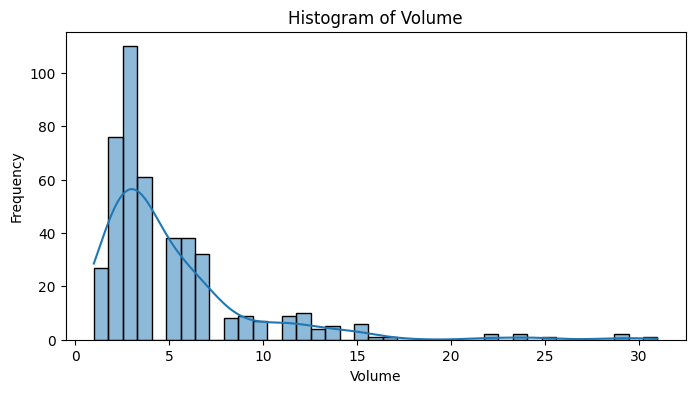

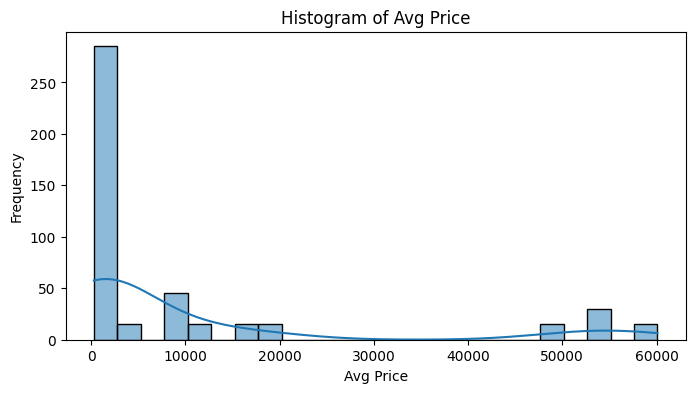

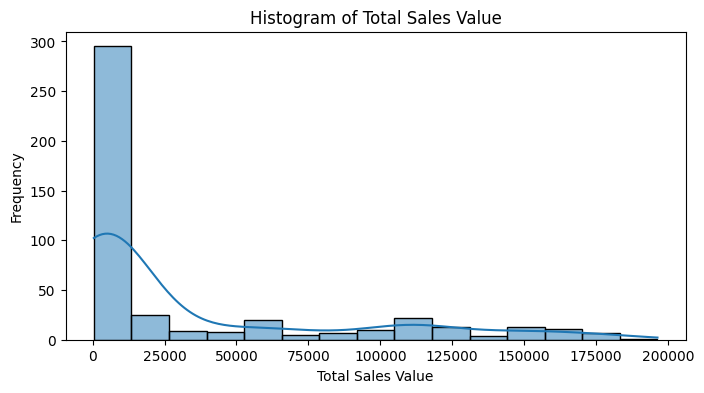

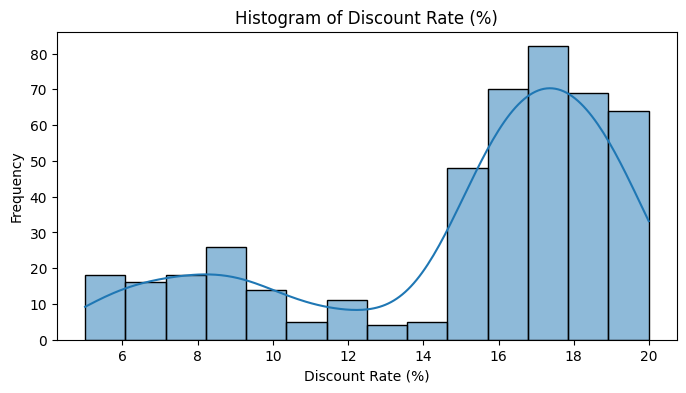

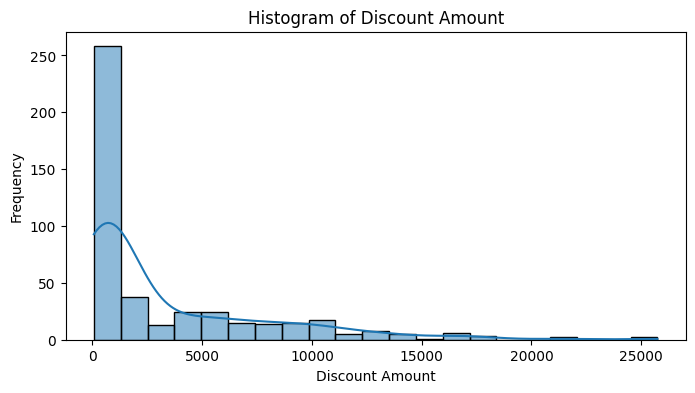

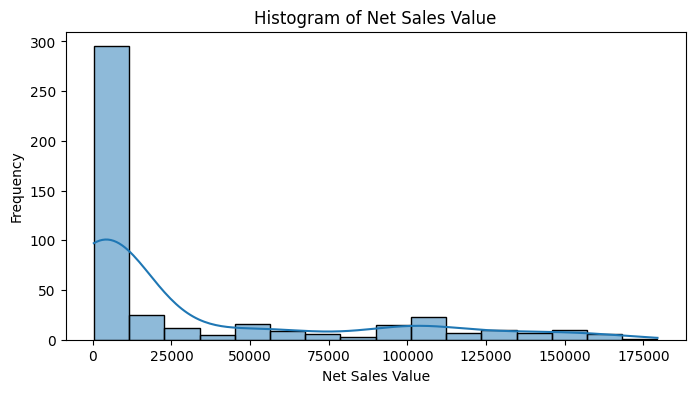

In [6]:
# Data Visualization

# Histograms
for col in numerical_cols:
    plt.figure(figsize=(8, 4))
    sns.histplot(df[col], kde=True)
    plt.title(f"Histogram of {col}")
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.show()


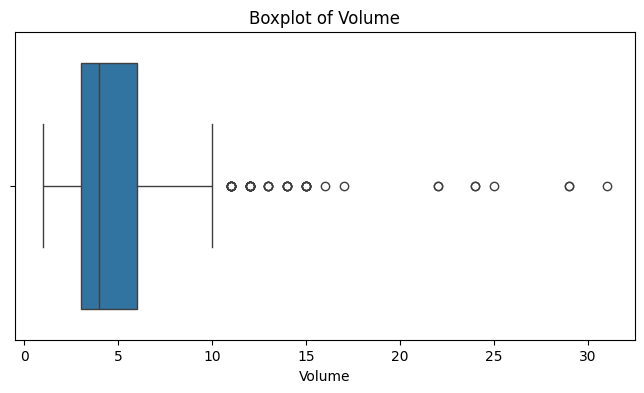

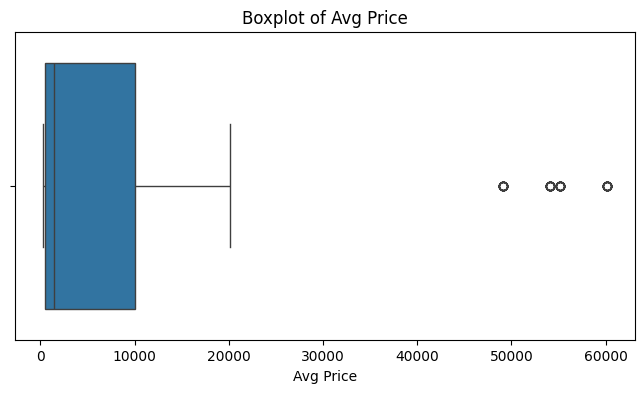

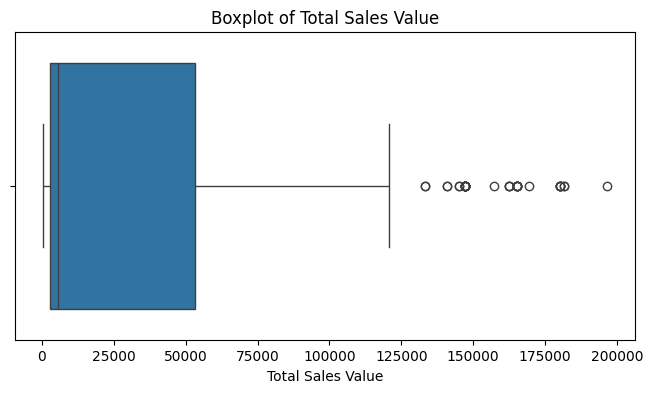

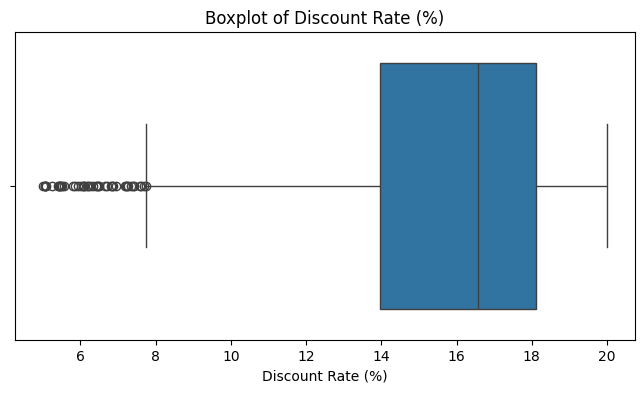

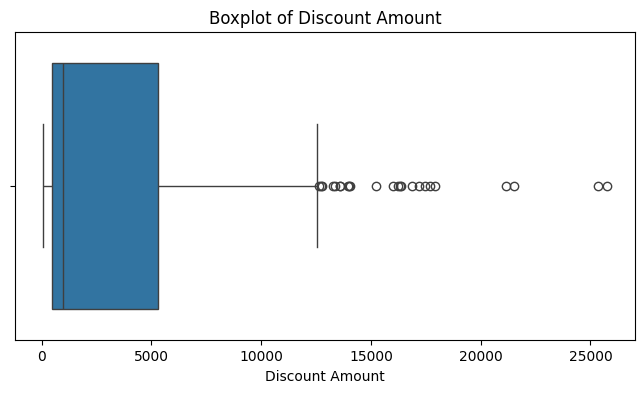

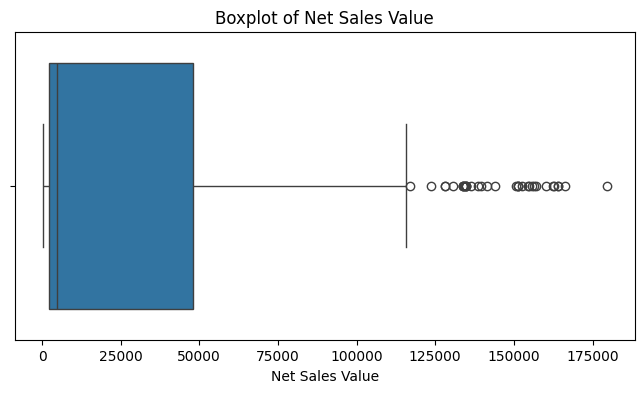

In [7]:
# Boxplots
for col in numerical_cols:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=df[col])
    plt.title(f"Boxplot of {col}")
    plt.xlabel(col)
    plt.show()

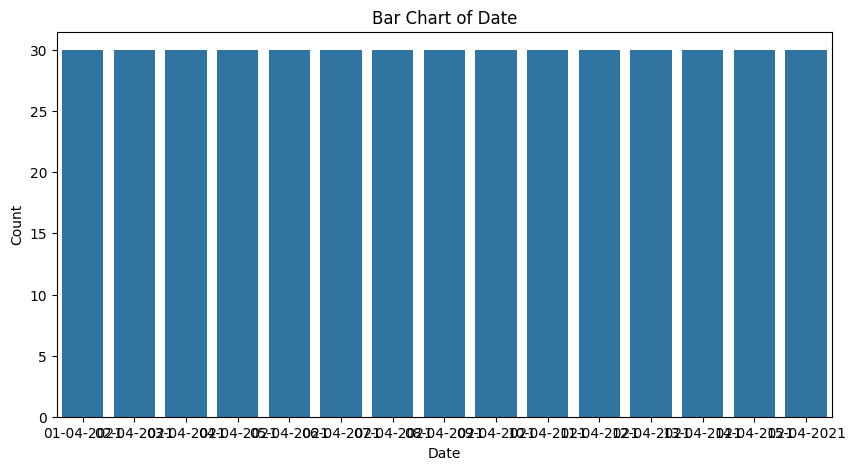

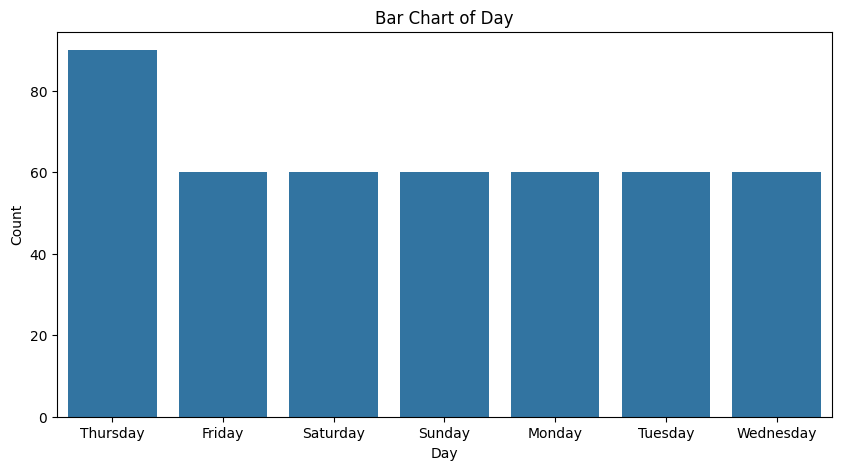

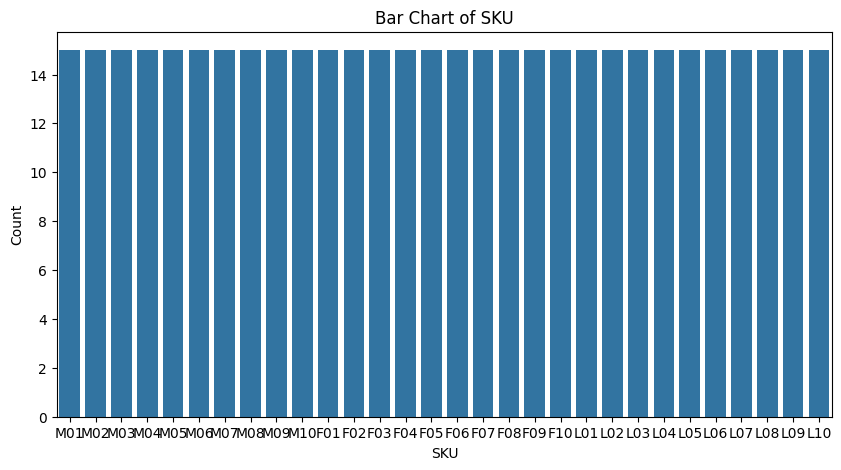

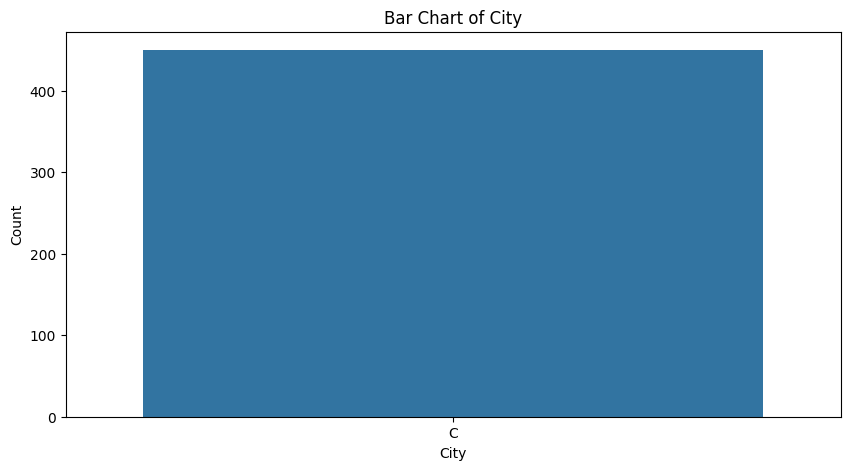

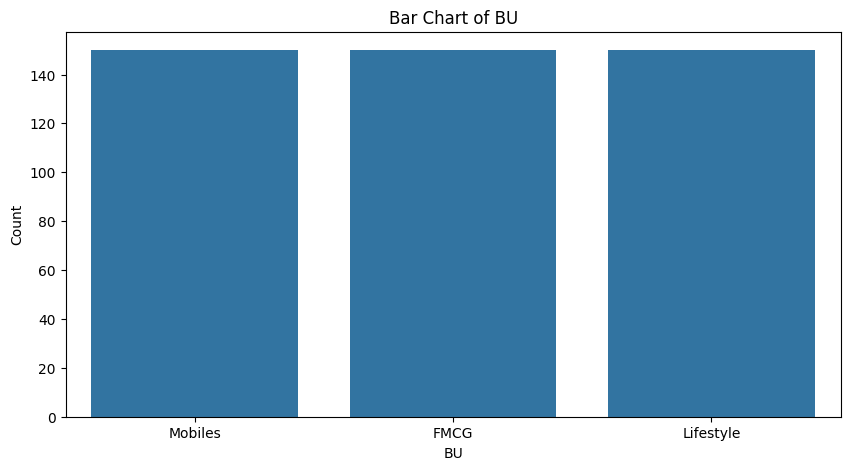

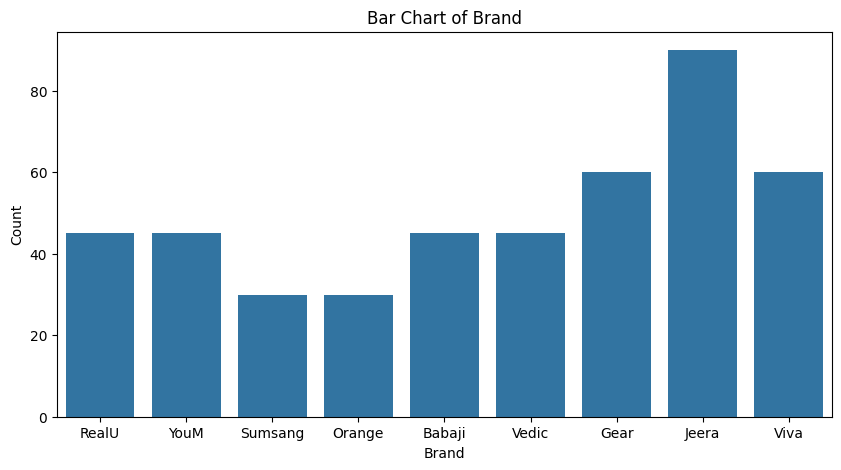

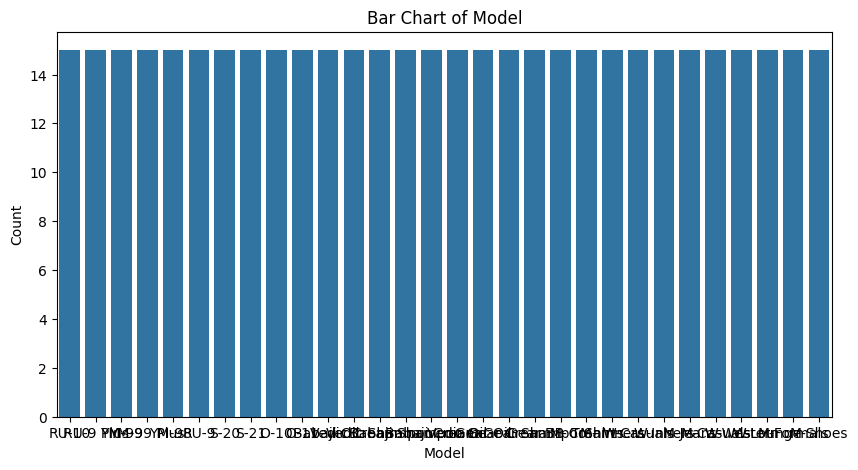

In [8]:
for col in categorical_cols:
    plt.figure(figsize=(10, 5))
    sns.countplot(data=df, x=col)
    plt.title(f"Bar Chart of {col}")
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.show()

In [9]:
# Standardization of Numerical Variables
df_standardized = df.copy()
for col in numerical_cols:
    mean = df[col].mean()
    std_dev = df[col].std()
    df_standardized[col] = (df[col] - mean) / std_dev

In [10]:
print(df[numerical_cols].head())
print(df_standardized[numerical_cols].head())

   Volume  Avg Price  Total Sales Value  Discount Rate (%)  Discount Amount  \
0      15      12100             181500          11.654820     21153.498820   
1      10      10100             101000          11.560498     11676.102961   
2       7      16100             112700           9.456886     10657.910157   
3       6      20100             120600           6.935385      8364.074702   
4       3       8100              24300          17.995663      4372.946230   

   Net Sales Value  
0    160346.501180  
1     89323.897039  
2    102042.089843  
3    112235.925298  
4     19927.053770  
     Volume  Avg Price  Total Sales Value  Discount Rate (%)  Discount Amount  \
0  2.347417   0.091072           2.922469          -0.829365         3.948422   
1  1.165831  -0.019548           1.329516          -0.851714         1.846958   
2  0.456880   0.312312           1.561038          -1.350129         1.621190   
3  0.220563   0.533552           1.717365          -1.947555         1.1125

In [11]:
df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

In [14]:
# Display a portion of the transformed dataset
print("\nTransformed Dataset with Dummy Variables (First 5 rows):")
print(df_encoded.head())


Transformed Dataset with Dummy Variables (First 5 rows):
   Volume  Avg Price  Total Sales Value  Discount Rate (%)  Discount Amount  \
0      15      12100             181500          11.654820     21153.498820   
1      10      10100             101000          11.560498     11676.102961   
2       7      16100             112700           9.456886     10657.910157   
3       6      20100             120600           6.935385      8364.074702   
4       3       8100              24300          17.995663      4372.946230   

   Net Sales Value  Date_02-04-2021  Date_03-04-2021  Date_04-04-2021  \
0    160346.501180            False            False            False   
1     89323.897039            False            False            False   
2    102042.089843            False            False            False   
3    112235.925298            False            False            False   
4     19927.053770            False            False            False   

   Date_05-04-2021  ...  Mod

In [15]:
# Conclusion
print("\nConclusion:")
print("Key findings from descriptive analytics and data visualizations:")
# Add summary statements for distribution shapes, outliers, etc.
print("\nData preprocessing steps like standardization and one-hot encoding help make the dataset suitable for machine learning models.")



Conclusion:
Key findings from descriptive analytics and data visualizations:

Data preprocessing steps like standardization and one-hot encoding help make the dataset suitable for machine learning models.


In [ ]:
Explanation of Code:
1.Data Loading & Summary: Loads the dataset and displays basic information.
2.Descriptive Statistics: Computes and displays mean, median, mode, and standard deviation for each numerical column.
3.Visualization:
  .Histograms: Plots histograms for each numerical column.
  .Boxplots: Creates boxplots to visualize outliers.
  .Bar Charts: Visualizes category counts for categorical columns.
4.Standardization: Standardizes numerical columns using z-score normalization.
5.One-Hot Encoding: Transforms categorical columns into dummy variables suitable for machine learning.
6.Conclusion: Summarizes insights and the importance of preprocessing.
This code should be a comprehensive start for conducting descriptive analytics and preparing your data for further analysis! Let me know if you need further customization.